## Purpose

The goal of this study is to determine if there is an underlying issue with the current wage distribution in America, namely between men and women. I will attempt to examine this phenomenon using a series of graphs/figures to better visualize what the data tells us about the relationship between wages and gender.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("datasets/wageGenderEduAge.csv")

In [3]:
display(df)

,wage,education,age,gender
0,5.10,8,35,female
1,4.95,9,57,female
2,5.71,12,34,female
3,3.35,12,26,female
4,4.00,12,64,female
...,...,...,...,...
529,12.50,15,31,male
530,16.00,12,30,male
531,11.36,18,29,male
532,19.88,12,31,male


Text(16.669166666666662, 0.5, 'Number of Individuals')

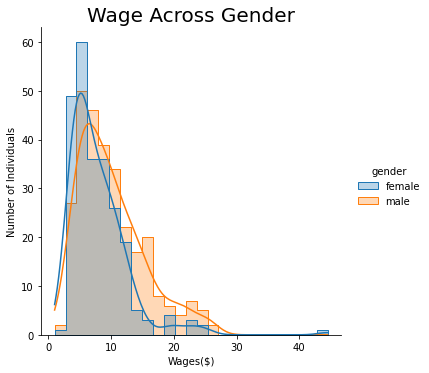

In [7]:
sns.displot(df, x="wage", hue="gender", kind="hist", bins = 25, alpha =0.3, 
            kde = True, element = 'step')
plt.title("Wage Across Gender",
         fontsize = 20)
plt.xlabel("Wages($)")
plt.ylabel("Number of Individuals")


**Figure 1:** Histogram and KDE plot of wage distribution (x-axis) across Gender (y-axis)

In order to investigate wage differences between men and women, I began by creating a basic histogram with a kde plot overlayed on top of it with the value of wages on the x-axis, and the number of either men and women who received those wages on the y-axis. Looking at the figure, there is clearly something amiss. It appears as though the distribution for men's ages is slightly skewed to the right, with the peak of the kde plot (i.e. the average wage) appearing slightly higher than that of the female distribution. 

Additionally, there are more women stuck at lower wages than men, as the count for male wages surpasses the female count in every wage bin starting at around $9. This suggests that more men are earning higher wages than their female counterparts. Let's look at some additional plots in order to have a more complete picture of the situation. 

Text(0, 0.5, 'Wages($)')

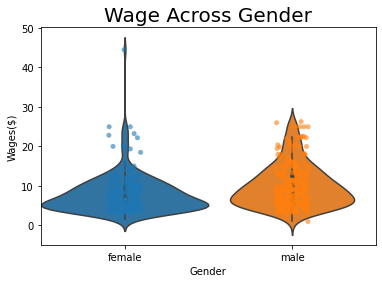

In [6]:
sns.violinplot(data=df, x="gender", y="wage", 
               width = 1)
strip = sns.stripplot(data=df, x="gender", y="wage", 
                      alpha = 0.6)
plt.title("Wage Across Gender",
         fontsize = 20)
plt.xlabel("Gender")
plt.ylabel("Wages($)")

**Figure 2:** Violin plot of wage distribution (y-axis) across Gender (x-axis)

This violin plot of Gender on the x-axis and Wages on the y-axis shows a similar phenomenon to what we observed with the previous graph, with a few notable exceptions. While the female distribution clearly extends further than the male distribution, when we really look, we can see that this is do to a single outlier from the female dataset. In reality, these distributions provide additional evidence that more men are earning higher wages than women. This is perfectly demonstrated by the density of the points around the $20 tick on the y-axis. The male distribution shows quite a few more individual points scattered in that region than female points in their distribution. 

Additionally, we see far more women are stuck at wage of less than $10 dollars (As can be seen by the wideness of their plot). The male plot in contrast, is not nearly as wide, indicating that the values are more spread out, namely towards the higher end of the wage spectrum. Let's look at another  plot examining these two dimensions in order to really get an accurate picture of this situation. 

Text(0, 0.5, 'Wage($)')

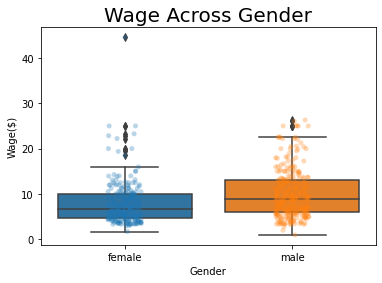

In [7]:
sns.boxplot(data=df, x="gender", y="wage")
strip = sns.stripplot(data=df, x="gender", y="wage", 
                      alpha = 0.3)
plt.title("Wage Across Gender",
         fontsize = 20)
plt.xlabel("Gender")
plt.ylabel("Wage($)")

**Figure 3:** Box plot of wage distribution (y-axis) across Gender (x-axis)

It is in this boxplot we can truly see the disparity between the two genders. Similar to the violin plot above, Gender has been plotted on the x-axis and wages on the y-axis. Here we can see the means (Represented by the solid black line in the middle of each distribution), are different. The males mean appears to be right aroudn 10 dollars, while the female mean is quite a bit lower. Additionally, we can see even more evidence that more men are earning higher wages as the tails on the boxplot (Representing 25 percent of the group we're looking at, and the middle box representing 50 percent) extends all the way to around 25 dollars, while the female distribtuion doesn't even extend to 20 dollars. This essentially tells us that more men are earning higher wages on average than women. 

Let's conduct some exploratory analysis to see if we can spot an alternative explanation for the trend we saw on these three graphs. 

Text(0, 0.5, 'Wage($)')

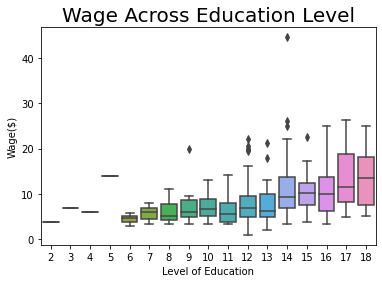

In [43]:
sns.boxplot(data=df, x="education", y="wage")
plt.title("Wage Across Education Level",
         fontsize = 20)
plt.xlabel("Level of Education")
plt.ylabel("Wage($)")

**Figure 4:** Box plot of wage distribution (y-axis) across Levels of Education (x-axis)

This boxplot shows a seemingly positive correlation between wages and an individual's level of education. However, it fails to tell us how or if this relationship is consistent across the two genders. Let's see what happens when we plot these data points on a scatterpolot, but differentiate the points by gender.

Text(29.524375, 0.5, 'Wage($)')

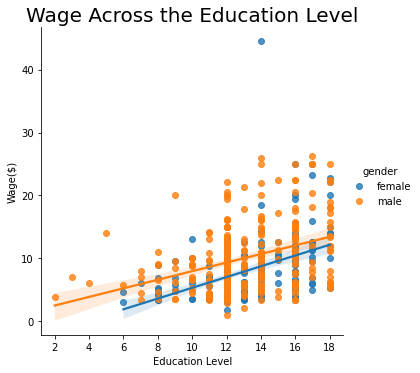

In [28]:
sns.lmplot(data=df, x='education', y='wage',hue = "gender")
plt.title("Wage Across the Education Level",
         fontsize = 20)
plt.xlabel("Education Level")
plt.ylabel("Wage($)")

**Figure 5:** Scatter plot of earned wages (y-axis) between the two genders across different level of education (x-axis)

This scatter plot shows a clear relationship between an individuals level of education (x-axis), and their expected wage (y-axis). While there is a positive correlation between the two variables for both genders, men not only start off at a higher wage for the same education level than women, but maintatin that difference through all levels of education. This clearly shows an unequal relationship between men and women when it comes to their recieved wages, as even when the two groups have the same level of education, women still earn a lower wage.

Text(0, 0.5, 'Wage($)')

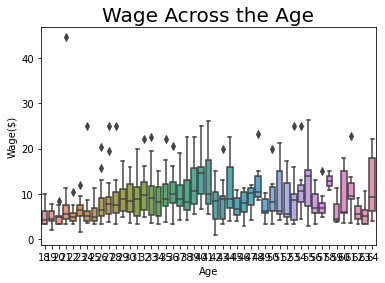

In [30]:
sns.boxplot(data=df, x="age", y="wage")
plt.title("Wage Across the Age",
         fontsize = 20)
plt.xlabel("Age")
plt.ylabel("Wage($)")

**Figure 6:** Box plot of wage distribution (y-axis) across different ages (x-axis)

This graph is pretty messy, but let's see if we can glean anything from it. There doesn't seems to be a clear relationship between the two variables execpt for a couple things: There is a general postive relationship between the two starting at around 18 years old and peaking at around 30, after that it begins to oscilate up and down as an individual's age increases. While this graph isn't super useful for making any defintive statements, let's go ahead see what these datapoint look like in a scatterplot.

Text(29.524375, 0.5, 'Wage($)')

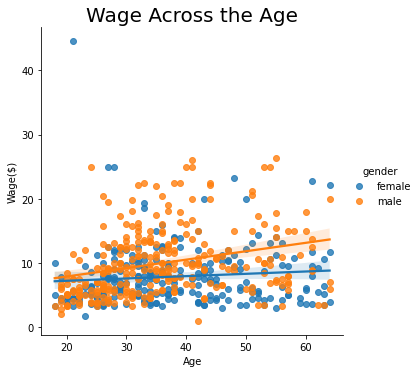

In [29]:
sns.lmplot(data=df, x='age', y='wage',hue = "gender")
plt.title("Wage Across the Age",
         fontsize = 20)
plt.xlabel("Age")
plt.ylabel("Wage($)")

**Figure 7:** Scatter plot of earned wages (y-axis) between the two genders across different ages (x-axis)

We again see a very clear disparity between men and women and their earned wages, but this time mediated by age. Similar to our plot looking at education levels, men continue to start off at higher wages, even when their female counterparts are the same age. The main interseting thing to note here is that men see a continual growth in their earned wages as they increase in age, but women seem to maintain a constant level across the entire working age spectrum. This just shows another facet to this unequal distribution of wages between men and women. 

# Conclusion

This collection of graphs suggest that there is a legitimate problem with the wage distribution between men and women in this country. Men seem to be more likely to earn a higher wage on average, despite things such as age and education level remaining fairly constant. The wage distribution for each gender must be investigated futher and proper steps must be taken in order to ensure equality across these individual's pay. 